<a href="https://colab.research.google.com/github/unicolour/ParameterOptimizationSVM/blob/main/ParameterOptimizationSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, 1:].values
  y = dfi.iloc[:, 0].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)

  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=500)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

-------- Sample 0-------

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3; 1/64] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 1/64] END C=0.1, gamma=0.1, kernel=rbf;, score=0.334 total time=   0.1s
[CV 2/3; 1/64] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 1/64] END C=0.1, gamma=0.1, kernel=rbf;, score=0.340 total time=   0.1s
[CV 3/3; 1/64] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 1/64] END C=0.1, gamma=0.1, kernel=rbf;, score=0.373 total time=   0.1s
[CV 1/3; 2/64] START C=0.1, gamma=0.1, kernel=poly..............................
[CV 1/3; 2/64] END C=0.1, gamma=0.1, kernel=poly;, score=0.505 total time=   0.1s
[CV 2/3; 2/64] START C=0.1, gamma=0.1, kernel=poly..............................
[CV 2/3; 2/64] END C=0.1, gamma=0.1, kernel=poly;, score=0.533 total time=   0.1s
[CV 3/3; 2/64] START C=0.1, gamma=0.1, kernel=poly..............................
[CV 3/3; 2/64] END 

In [4]:
svm_best_params

[{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}]

In [5]:
test_accs

[0.865,
 0.89,
 0.8583333333333333,
 0.8733333333333333,
 0.8583333333333333,
 0.8816666666666667,
 0.86,
 0.8433333333333334,
 0.8766666666666667,
 0.86]

In [6]:
final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.865,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.89,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.858333,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.873333,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.858333,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.881667,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.86,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.843333,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.876667,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.86,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
iterations = list()
acc_list = list()

for i in range(500):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [10]:
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [11]:
print(iterations.shape)
print(acc_list.shape)

(500,)
(500,)


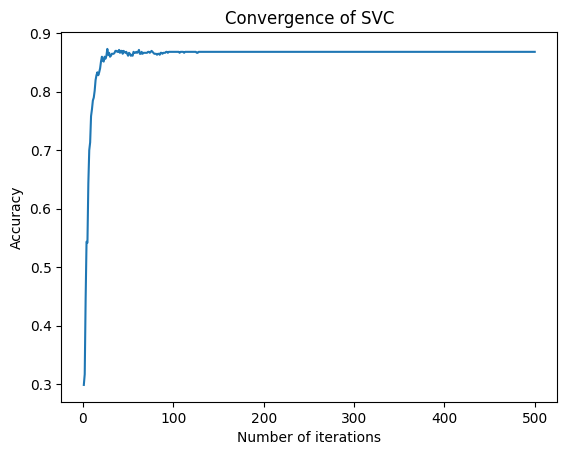

In [12]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()